# Data Preprocessing

In [1]:
import tensorflow as tf 
import cv2,os
import numpy as np
import keras

data_path=r'C:\Users\Amrita\Downloads\mini project\dataset'
categories=os.listdir(data_path)
labels=[i for i in range(len(categories))]

label_dict=dict(zip(categories,labels))

print(label_dict)
print(categories)
print(labels)

ModuleNotFoundError: No module named 'tensorflow'

In [ ]:
img_size=100
data=[]
target=[]

for category in categories:
    folder_path=os.path.join(data_path,category)
    img_names=os.listdir(folder_path)
        
    for img_name in img_names:
        img_path=os.path.join(folder_path,img_name)
        img=cv2.imread(img_path)

        try:
            gray=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)           
            #Converting the image into gray scale
            resized=cv2.resize(gray,(img_size,img_size))
            #resizing the gray scale into 100x100, since we need a fixed common size for all the images in the dataset
            data.append(resized)
            target.append(label_dict[category])
            #appending the image and the label(categorized) into the list (dataset)

        except Exception as e:
            print('Exception:',e)
            #if any exception raised, the exception will be printed here. And pass to the next image

In [ ]:
import numpy as np
from sklearn.preprocessing import LabelBinarizer

from keras.utils import np_utils
data=np.array(data)/255.0
data=np.reshape(data,(data.shape[0],img_size,img_size,1))

lb= LabelBinarizer()
target=lb.fit_transform(target)
target=np_utils.to_categorical(target)

target=np.array(target)

In [ ]:
from keras.models import Sequential
from keras.layers import Dense,Activation,Flatten,Dropout
from keras.layers import Conv2D,MaxPooling2D

num_classes=2

model=Sequential()
model.call = tf.function(model.call)

model.add(Conv2D(64,(3,3),input_shape=(img_size,img_size,1)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
#The first CNN layer followed by Relu and MaxPooling layers

model.add(Conv2D(128,(3,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
#The second convolution layer followed by Relu and MaxPooling layers

model.add(Flatten())
model.add(Dropout(0.5))

model.add(Dense(64,activation='relu'))
#Dense layer of 64 neurons
model.add(Dense(num_classes,activation='softmax'))
#The Final layer with two outputs for two categories


# training


In [13]:
from tensorflow.keras.optimizers import Adam 
from keras.callbacks import ModelCheckpoint

In [14]:
from sklearn.model_selection import train_test_split

train_data,test_data,train_target,test_target=train_test_split(data,target,test_size=0.1,random_state=0)

In [15]:
tf.compat.v1.disable_eager_execution()
model.compile(loss='categorical_crossentropy',optimizer=Adam(learning_rate=0.001),metrics=['accuracy'])
checkpoint = ModelCheckpoint('model-{epoch:03d}.model',monitor='val_loss',verbose=0,save_best_only=True,mode='auto')
history=model.fit(train_data,train_target,callbacks=[checkpoint],epochs=20,validation_split=0.25)


Train on 1403 samples, validate on 468 samples
Epoch 1/20
1403/1403 [==============================] - ETA: 0s - loss: 0.6595 - accuracy: 0.6957

C:\Users\Amrita\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\engine\training_v1.py:2057: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  updates = self.state_updates


INFO:tensorflow:Assets written to: model-001.model\assets
1403/1403 [==============================] - 16s 11ms/sample - loss: 0.6595 - accuracy: 0.6957 - val_loss: 0.4653 - val_accuracy: 0.8205
Epoch 2/20
1403/1403 [==============================] - 16s 12ms/sample - loss: 0.3779 - accuracy: 0.8510 - val_loss: 0.3021 - val_accuracy: 0.8632
Epoch 3/20
1403/1403 [==============================] - 19s 13ms/sample - loss: 0.2424 - accuracy: 0.9052 - val_loss: 0.2197 - val_accuracy: 0.9188
Epoch 4/20
1403/1403 [==============================] - 19s 14ms/sample - loss: 0.1788 - accuracy: 0.9266 - val_loss: 0.1932 - val_accuracy: 0.9231
Epoch 5/20
1403/1403 [==============================] - 19s 14ms/sample - loss: 0.1229 - accuracy: 0.9572 - val_loss: 0.1542 - val_accuracy: 0.9423
Epoch 6/20
1403/1403 [==============================] - 19s 14ms/sample - loss: 0.0923 - accuracy: 0.9644 - val_loss: 0.1474 - val_accuracy: 0.9402
Epoch 7/20
1403/1403 [==============================] - 18s 13ms/

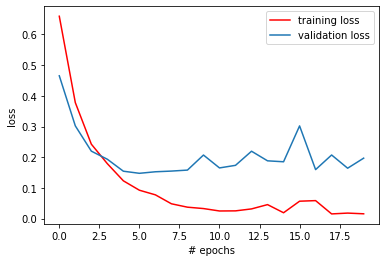

In [16]:
from matplotlib import pyplot as plt
plt.plot(history.history['loss'],'r',label='training loss')
plt.plot(history.history['val_loss'],label='validation loss')
plt.xlabel('# epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

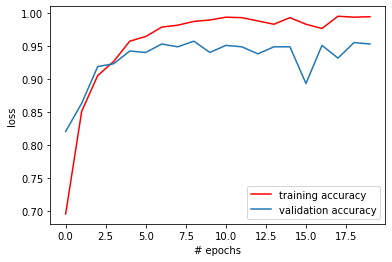

In [18]:
plt.plot(history.history['accuracy'],'r',label='training accuracy')
plt.plot(history.history['val_accuracy'],label='validation accuracy')
plt.xlabel('# epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

In [24]:

scores=model.evaluate(test_data,test_target,verbose=0)
print("accuracy: %.2f%%" % (scores[1]*100))

accuracy: 94.71%
